In [1]:
%matplotlib inline

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
alpha = 0.8
max_it = 5000
landa = 1
matrix = np.genfromtxt("part3data.txt",delimiter = ',')
NUM_OF_DATA = len(matrix)

X = (matrix[:,0:2])
X = np.concatenate((np.ones((1,NUM_OF_DATA)), X.T)).T
Y = (matrix[:,2])

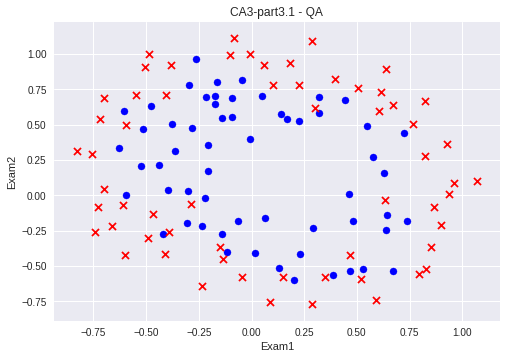

In [4]:
pass_student = matrix[matrix[:,2]==1.]
failed_student = matrix[matrix[:,2]==0.0]
plt.scatter(pass_student[:,0], pass_student[:,1], s=50, c='b', marker='o', label='Admitted')
plt.scatter(failed_student[:,0], failed_student[:,1], s=50, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('CA3-part3.1 - QA')

In [5]:
x1 = matrix[:,0:1]
x2 = matrix[:,1:2]
cnt = 0
for i in range(2,7):
    for j in range(0,i+1):
        X = np.hstack((X,np.multiply(np.power(x1,j),np.power(x2,i-j))))
n = len(X[0])

In [6]:
x_min = X.min(0)
x_max = X.max(0)
x_mean = X.mean(0)
def feature_scale( feature_num, a):
    return (a - x_mean[feature_num]) / (x_max[feature_num] - x_min[feature_num])

In [7]:
def feature_scaling_all(x):
    for j in range(1,n):
        for i in range(0,len(x)):
            x[i][j] = feature_scale(j, x[i][j])

In [8]:
feature_scaling_all(X)

In [9]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [10]:
def cost(theta, X, y):
    m = NUM_OF_DATA
    first = np.multiply(-y, np.log(sigmoid(np.dot(X , theta.T))))
    second = np.multiply((1 - y), np.log(1 - sigmoid(np.dot(X , theta.T))))
    reg = (landa / 2 * len(X)) * np.sum(np.power(theta, 2))
    return np.sum(first - second) / (len(X)) + reg

In [11]:
def gradient(theta, X, y):  
    parameters = n
    grad = np.zeros(parameters)
    error = sigmoid(np.dot(X,theta.T)) - y
    m = NUM_OF_DATA
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if i == 0:
            grad[i] = np.sum(term) / m
        else:
            grad[i] = (np.sum(term) / m) + ((landa / m) * theta[i])
    return grad

In [12]:
x = X
y = Y
theta = np.ones(n)
count_it = 0
J = []
while count_it < max_it :
    count_it += 1
    npd = np.dot(x , theta)
    npde = np.exp(-npd)
    h = 1./(1 + npde)
    j = cost(theta,x,y)
    g = gradient(theta,x,y)
    theta = theta - alpha * g
    J.append(j)
print theta
print j

[-0.54093358  4.36338929  7.56743699 -7.74070421 -7.31744921 -6.05564903
  0.19815233  0.5138709   1.10311164  1.26541902 -5.51524998 -3.3768077
 -0.90169589  0.77271475 -6.38221715 -0.19529216 -3.34759039 -1.84969232
  5.66418511 -0.46862857 -1.23216205 -2.3887001  -3.03564691 -3.55850974
  2.31414206 -0.97429072  0.94603155 -5.27182076]
0.3144728487


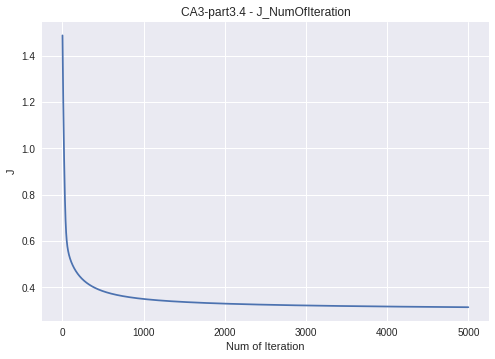

In [13]:
plt.plot(J)
plt.xlabel('Num of Iteration')
plt.ylabel('J')
plt.title('CA3-part3.4 - J_NumOfIteration')

In [14]:
def Incode_features_scaling(vec,theta):
    for i in range(2,7):
        for j in range(0,i+1):
            vec.append(vec[1]**j * vec[2]**(i-j))
    ans = theta[0]
    for i in range(1,n):
        ans += feature_scale(i , vec[i]) * theta[i]
    return ans

In [15]:
def probability(theta,exam1,exam2):
    return sigmoid(Incode_features_scaling([1.,exam1,exam2],theta))

def predict(theta,exam1,exam2):
    prob = probability(theta,exam1,exam2)
    if prob > 0.5:
        return 1
    return 0

In [16]:
print probability(theta,0.3,0)
print probability(theta,0.50634,0.75804)

0.979857068604
0.0282002314021


ترسیم مرز تصمیم (امتیازی)

داخل مرز صورتی را یک بر می گرداند و بیرون آن را صفر
و خطوط سفید تا سیاه هم در شکل احتمال موفقیت آن ذکر شده اند

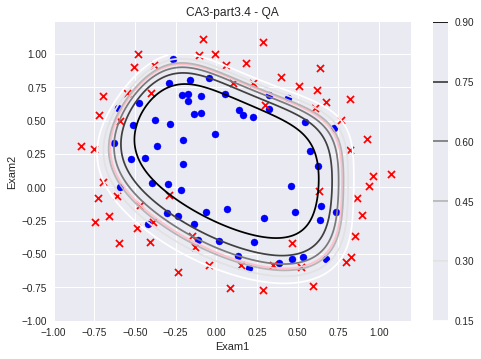

In [17]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
xx, yy = np.meshgrid(x, y)
z = xx
for i in range(0,len(xx)):
    for j in range(0,len(yy)):
        z[i][j] = probability(theta,xx[i][j],yy[i][j])
        
plt.contour(x, y, z ,[0.5] , colors='pink')
plt.contour(x, y, z)
plt.colorbar()
plt.scatter(pass_student[:,0], pass_student[:,1], s=50, c='b', marker='o', label='Admitted')
plt.scatter(failed_student[:,0], failed_student[:,1], s=50, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('CA3-part3.4 - QA')
plt.show()